# Projet de Data Mining: Clustering

## Jeu de donnée

   Notre jeu de donnée est issu de 'the young people survey' trouvé sur Kaggle. Nous essayons de trouver si certains groupes de personne apprécient d'avantage un type de musique en particuliers par rapport à d'autres.
    Puis, avec certaines caractéristiques, pouvons-nous deviner quel type de musique une personne est le plus suceptible d'aimer?
    
## Nettoyage et partition des données

   Pour le clustering, nous avons décidé de choisir par petite groupe de données ( uniquement les types de musiques ou uniquement les types de film par exemple) et ensuite, retirer les données manquantes dans ces sous-ensembles. Ce choix a été fait car retirer les donées manquantes sur l'ensemble des données faire cela sur l'ensemble des données apportait une trop grande perte d'information.
   
   Dans un premier temps, nous allons garder exclusivement les types de musique voir s'il est possible de faire ressortir des clusters, nous testerons également par la suite avec un sous-ensemble contenant uniquement les vidéos, et ensuite un sous-ensemble rassemblant musique et video.


In [1]:
from pandas import DataFrame, read_csv
import pandas as pd
import numpy as np
from datetime import datetime
import csv;

from math import sqrt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm

from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from scipy.spatial.distance import cdist, pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.cluster.hierarchy as hac

from __future__ import print_function



# determine k using elbow method
def test_Kmeans(data, titre):
    K = range(1,10)

    fig, axes23 = plt.subplots(1, 3)
    fig.set_size_inches(18,5)
    for i, axe in zip(range(0,3), axes23):
        algos = ["auto", "full", "elkan"]
        distortions = []
        for k in K:
            kmeanModel = KMeans(n_clusters=k, algorithm=algos[i]).fit(data)
            kmeanModel.fit(data)
            distortions.append(sum(np.min(cdist(data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])
        # Plot the elbow
        axe.plot(K, distortions, 'bx-')
        
        plt.setp(axe, title='The Elbow Method showing the optimal k for {}\n algorithm: {} \n'.format(titre, algos[i]), xlabel='k',ylabel='Distortion')

    plt.tight_layout()
    plt.show()
        

def draw_clusters(datas, titre):    
    fig = plt.figure(figsize=(18,10))

    data_dist = pdist(datas) # computing the distance
    data_link = linkage(data_dist, method='ward') # computing the linkage

    ddata =dendrogram(data_link,labels=datas.index.values)

    ax1 = plt.gca()
    ax1.set_xticklabels(labels=datas.index.values,rotation=90 )

    plt.xlabel('{}'.format(titre))
    plt.ylabel('Distance')
    plt.suptitle('{} clustering'.format(titre), fontweight='bold', fontsize=14);

    plt.show()


    
## K-means

Ne connaissant pas le nombre de cluster qu'il nous faudrait, nous voulons d'abord essayer de définir ce K.
Il n'y a pas de méthode optimale et absolue mais il y a plusieurs méthodes qui peuvent être efficaces ou non pour un problème donné. Nous essaierons ici la méthode du coude (elbow method) et la silhouette.

Nous pouvons choisir trois choix différents pour le paramètre définissant l'agorithm pour effectuer notre K-Means sous Python:

- auto: Choisi automatiquement "elkan" quand les données sont denses et "full" quand elle ne le sont pas.
- full: Il s'agit de l'algorithme classique de style EM, Lloyd's algorithm.
- elkan: Il s'agit d'une variation du Lloyd algorithm qui utilise les inégalités triangulaires, plus rapide et optimisé mais ne fonctionne pas actuellement sur les données dispersées.


### Elbow Method
L'idée derrière l'algorithme K-means est d'essayer de trouver des clusters qui minimisent la variance intra-cluster, ce qui revient à maximiser somme des carrés inter-cluster car la variance totale est fixée.
Nous pouvons directement utiliser le somme des carrés intra-cluster et regarder sa variation lorsque nous augmentons le nombre de clusters: un changement brutal dans l'évolution de la somme des carrés suggère que nous avons trouvé une solution optimale, cependant, cela ne se repose que sur une appréciation visuelle. Comme le total de la variance est fixé, c'est équivalent au fait d'étudier comment le ratio entre le carré de la somme intra-cluster et son total évolue. Ce ratio est aussi appelé le pourcentage de la variance expliquée. Car dans le cas du nombre de cluster optimal, il y aura un écart important du nombre k de cluster par rapport au nombre k+1.  

En résumé, il faut simplement calculer le carré des distances entre chaque point de donnée et leur centre respectif pour chaque cluster -- cela donne la somme des carrés intra-cluster. Le total de la somme des carrées intra-cluster est simplement la somme sur tous les clusters de leur somme des carrés intra-cluster respectifs. Pour transformer ces derniers en variance, il suffit de diviser par leur degré de liberté correspondant. La somme des carrés inter-clusters est obtenue en soustrayant le total de la somme des carrés intra-clusters au total de la somme des carrés.  

La Elbow method s'intéresse au pourcentage de variance expliquée comme une fonction du nombre de clusters: Un nombre de cluster doit être choisi de manière a ce que l'ajout d'un autre cluster ne donne pas une modélisation des données beaucoup plus pertinente. Plus précisément, si on affiche le pourcentage de la variance expliqué par les clusters par le nombre de clusters, les premiers clusters ajoutent beaucoup plus d'information mais à un certain point, le gain chutera en faisant apparaître un angle dans le graphique. Le nombre de cluster est choisi sur ce point, d'où le nom de 'elbow criterion'. Ce "coude" ne peut pas toujours être identifié sans ambiguïté.  

Nous allons le tester sur les différents algorithmes applicables à k-mean: “auto”, “full” et “elkan”. Par défaut, c'est le paramètre "auto" qui est utilisé.  

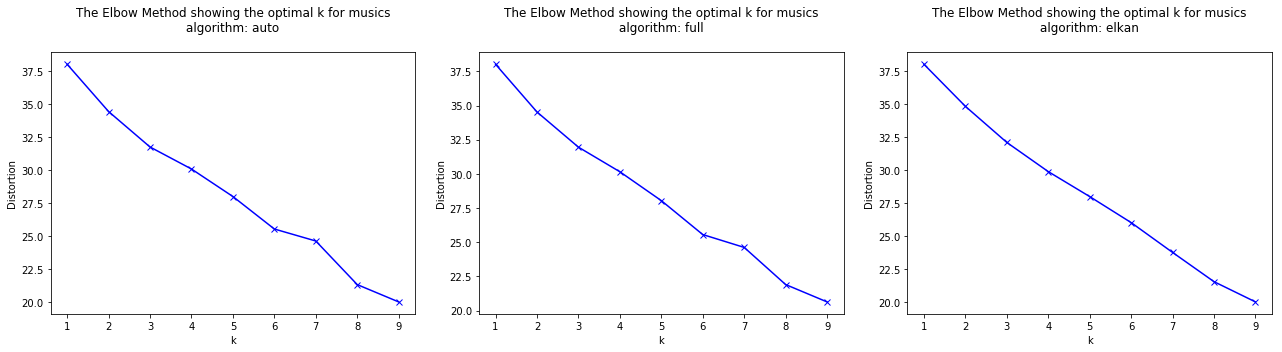

In [2]:
# With Music Datas

# load datas
donnees_music = pd.read_csv("./ressource_cluster/music.csv", ",").T

# k means determine k
test_Kmeans(donnees_music, 'musics')

Sur les données concernant la musique que nous étudions, le résultat est particulièrement clair: l'algorithme ne permet pas définir quoi que ce soit. Par pur curiosité, nous allons tester pour les autres jeux de données sur lesquels nous travaillerons (les films et l'ensemble avec les films et les musiques).

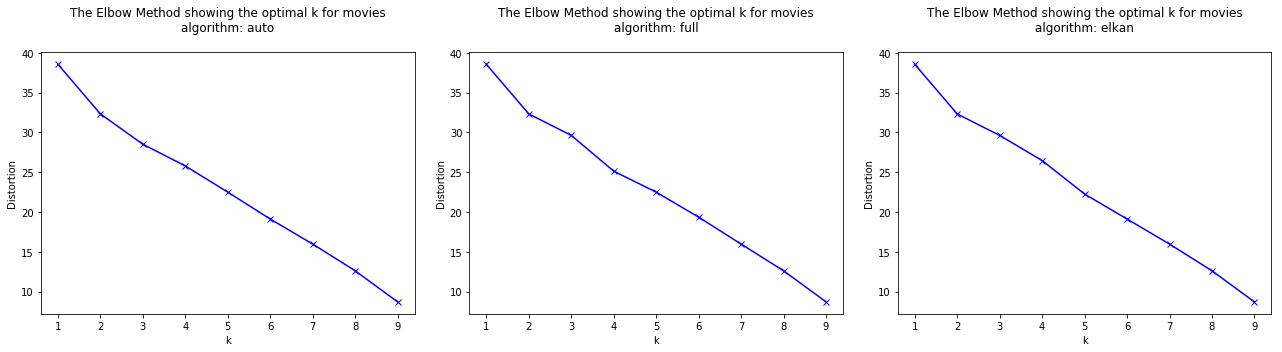

In [3]:

# With movie datas

donnees_movie = pd.read_csv("./ressource_cluster/movie.csv", ",").T

# k means determine k
test_Kmeans(donnees_movie, 'movies')


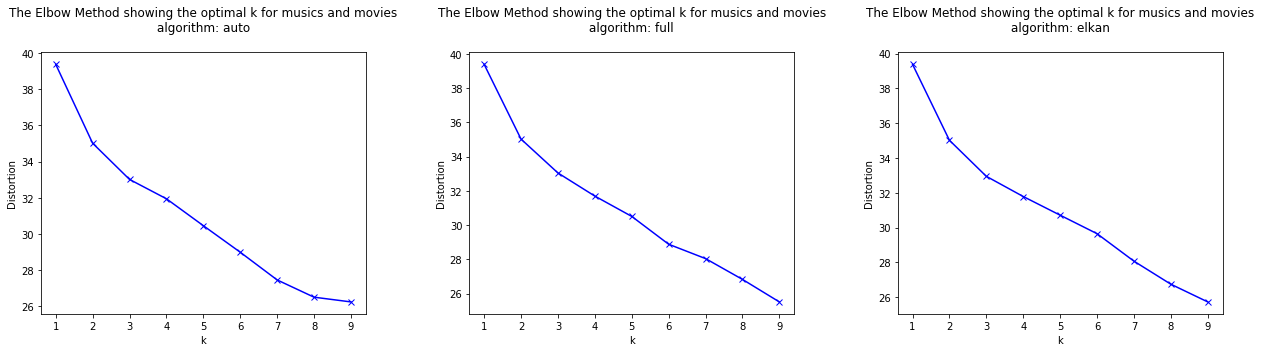

In [4]:
# with musics and movies

donnees_music_movie = pd.read_csv("./ressource_cluster/music_movie.csv", ",").T

# k means determine k

test_Kmeans(donnees_music_movie, 'musics and movies')

Cette méthode n'est pas très pertinente dans le cas présent, car le ralentissement qui devrait être brusque et former un 'coude' n'apparait pas ici, avec aucun des jeux de données proposé, même en changeant les algorithmes, les résultats ne sont pas pertinents.


## Hierarchical Clustering
Les clusters hiérarchiques sont une méthode d’analyse de cluster qui cherche à créer une hiérarchie de clusters. Il y a globalement deux types de stratégies pour faire des clusters hiérarchiques.
Agglomérer: Il s’agit d’une approche de ‘bas en haut’, chaque observation commence avec son propre cluster et les paires des clusters les plus proches sont fusionnées tandis qu’on monte dans la hiérarchie.
Diviser: Il s’agit d’une approche de ‘haut en bas’, toutes les observations débutent dans un seul cluster, et sont séparés alors que l’on descend dans la hiérarchie.

Nous pouvons aborder la problématique de clusterisation par regroupement hiérarchique en trois étapes:
- Quantifier les données.
- Clusteriser les données.
- Choisir le nombre de clusters.

La méthode hierarchy de scipy permet de faire les deux premières étapes. Cependant, il y a différents paramètres que nous devons tester. En effet, nous pouvons faire varier la manière dont sont quantifiées et clusterisées les données.

Ce que nous allons faire dans un premier temps:
Vérifier qu’elle est la métrique la plus appropriée: une norme différente quantifierons nos données différemment.
Vérifier les différentes propriétés et comportements des méthodes de clusterisation proposées.

Nous pouvons utiliser différente normes pour la quantification des données, nous testerons la norme L1, L2 et L_inf avec respectivement les paramètres cityblock, euclidean and chebychev.
Pour la clusterisation, nous testerons les différentes options du paramètres méthode: 'single', 'complete', 'average', ‘weighted’, ‘centroid’, ‘median’, ‘ward’. Parmi ces méthodes, les premières se basent sur la distance minimale, maximale ou leur moyenne, tandis que d’autres sont plus complexes: la documentation de la fonction linkage fourni les informations nécessaires sur ces différentes méthodes de calcule. 


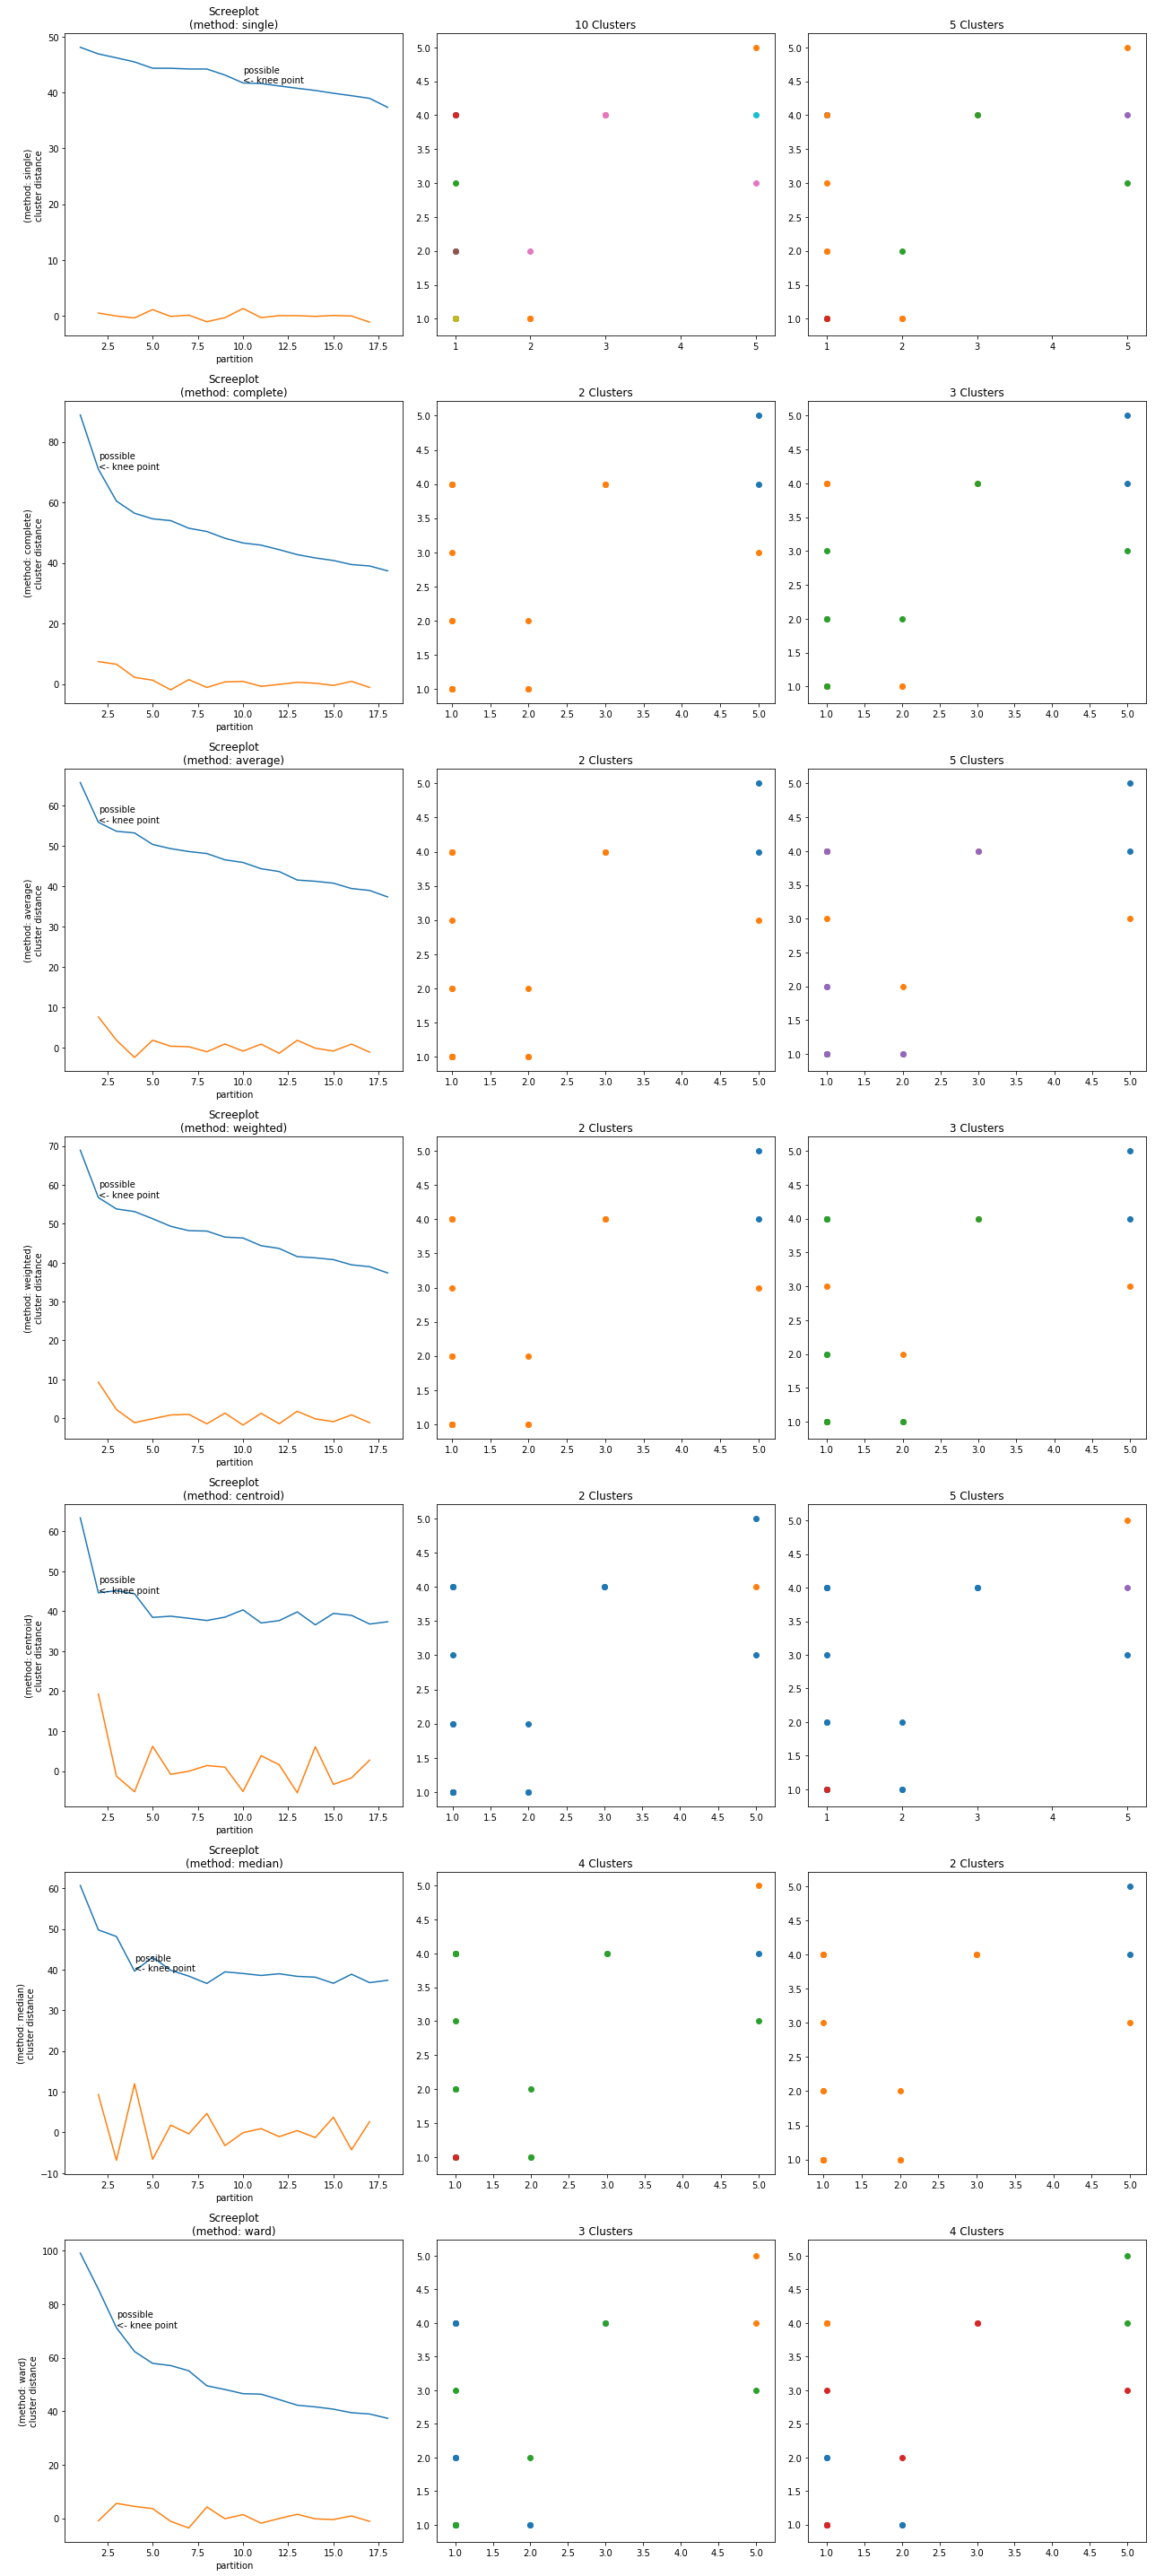

In [5]:


donnees = pd.read_csv("./ressource_cluster/music.csv", ",")

a = donnees.iloc[:,:].T.values

fig, axes23 = plt.subplots(7, 3)
fig.set_size_inches(18,40)
for method, axes in zip([ 'single','complete', 'average', 'weighted', 'centroid', 'median', 'ward'], axes23):
    z = hac.linkage(a, method=method)

    # Plotting
    axes[0].plot(range(1, len(z)+1), z[::-1, 2])
    knee = np.diff(z[::-1, 2], 2)
    axes[0].plot(range(2, len(z)), knee)

    num_clust1 = knee.argmax() + 2
    knee[knee.argmax()] = 0
    num_clust2 = knee.argmax() + 2

    axes[0].text(num_clust1, z[::-1, 2][num_clust1-1], 'possible\n<- knee point')

    part1 = hac.fcluster(z, num_clust1, 'maxclust')
    part2 = hac.fcluster(z, num_clust2, 'maxclust')

    for part, ax in zip([part1, part2], axes[1:]):
        for cluster in set(part):
            ax.scatter(a[part == cluster, 0], a[part == cluster, 1]) 

    m = '\n(method: {})'.format(method)
    plt.setp(axes[0], title='Screeplot{}'.format(m), xlabel='partition',
             ylabel='{}\ncluster distance'.format(m))
    plt.setp(axes[1], title='{} Clusters'.format(num_clust1))
    plt.setp(axes[2], title='{} Clusters'.format(num_clust2))

plt.tight_layout()
plt.show()


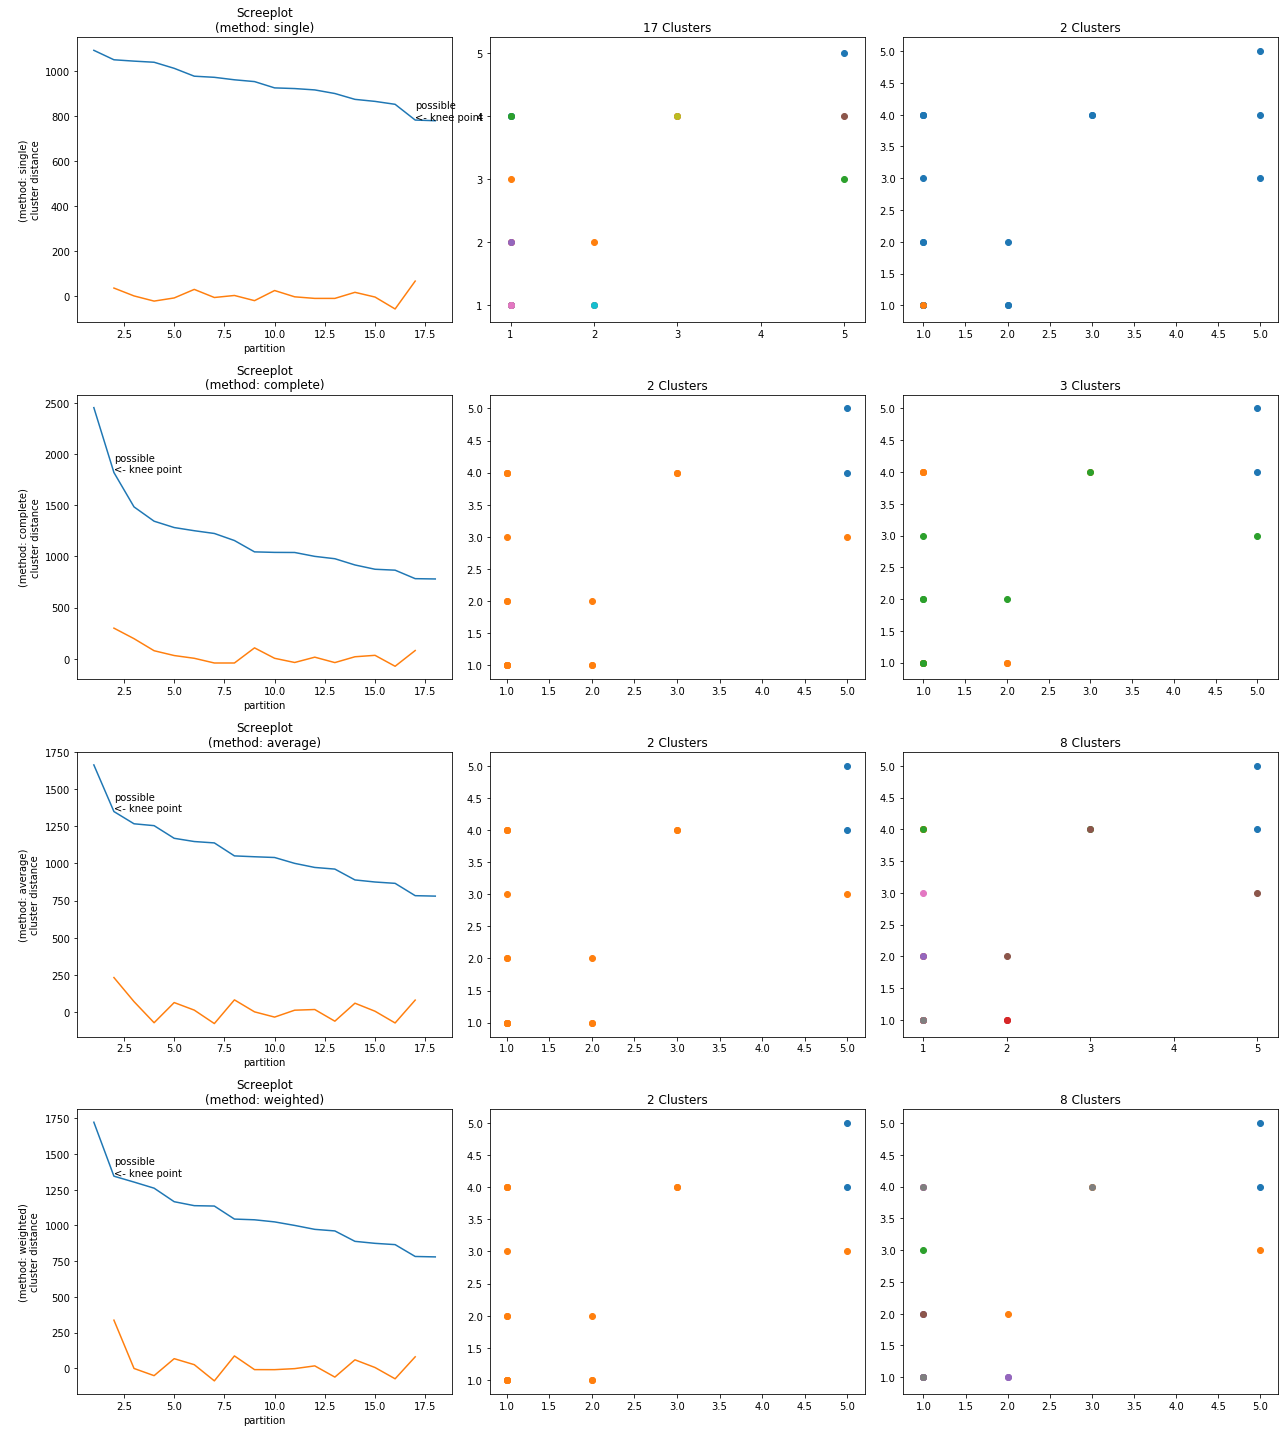

In [8]:

donnees = pd.read_csv("./ressource_cluster/music.csv", ",")

a = donnees.iloc[:,:].T.values

fig, axes23 = plt.subplots(4, 3)
fig.set_size_inches(18,20)
for method, axes in zip([ 'single','complete', 'average', 'weighted'], axes23):
    z = hac.linkage(a, method=method, metric="cityblock")

    # Plotting
    axes[0].plot(range(1, len(z)+1), z[::-1, 2])
    knee = np.diff(z[::-1, 2], 2)
    axes[0].plot(range(2, len(z)), knee)

    num_clust1 = knee.argmax() + 2
    knee[knee.argmax()] = 0
    num_clust2 = knee.argmax() + 2

    axes[0].text(num_clust1, z[::-1, 2][num_clust1-1], 'possible\n<- knee point')

    part1 = hac.fcluster(z, num_clust1, 'maxclust')
    part2 = hac.fcluster(z, num_clust2, 'maxclust')

    for part, ax in zip([part1, part2], axes[1:]):
        for cluster in set(part):
            ax.scatter(a[part == cluster, 0], a[part == cluster, 1]) 

    m = '\n(method: {})'.format(method)
    plt.setp(axes[0], title='Screeplot{}'.format(m), xlabel='partition',
             ylabel='{}\ncluster distance'.format(m))
    plt.setp(axes[1], title='{} Clusters'.format(num_clust1))
    plt.setp(axes[2], title='{} Clusters'.format(num_clust2))

plt.tight_layout()
plt.show()


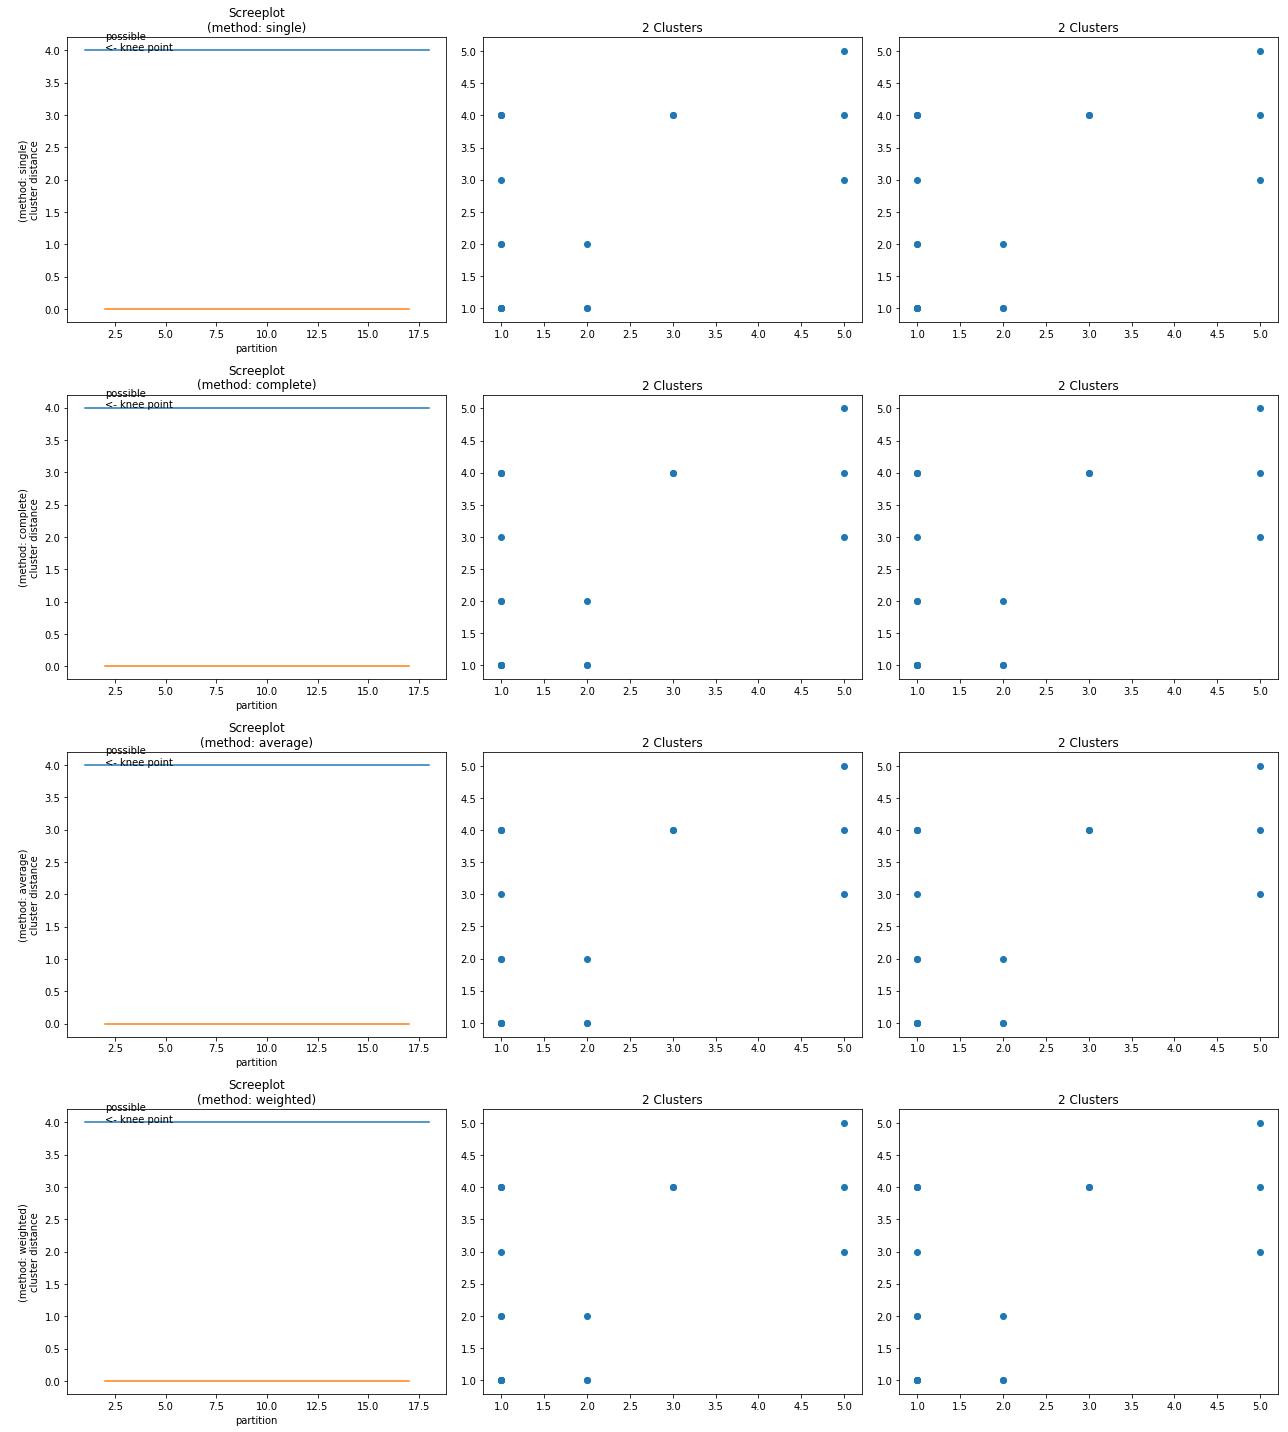

In [6]:

donnees = pd.read_csv("./ressource_cluster/music.csv", ",")

a = donnees.iloc[:,:].T.values

fig, axes23 = plt.subplots(4, 3)
fig.set_size_inches(18,20)
for method, axes in zip([ 'single','complete', 'average', 'weighted'], axes23):
    z = hac.linkage(a, method=method, metric="chebychev")

    # Plotting
    axes[0].plot(range(1, len(z)+1), z[::-1, 2])
    knee = np.diff(z[::-1, 2], 2)
    axes[0].plot(range(2, len(z)), knee)

    num_clust1 = knee.argmax() + 2
    knee[knee.argmax()] = 0
    num_clust2 = knee.argmax() + 2

    axes[0].text(num_clust1, z[::-1, 2][num_clust1-1], 'possible\n<- knee point')

    part1 = hac.fcluster(z, num_clust1, 'maxclust')
    part2 = hac.fcluster(z, num_clust2, 'maxclust')

    for part, ax in zip([part1, part2], axes[1:]):
        for cluster in set(part):
            ax.scatter(a[part == cluster, 0], a[part == cluster, 1]) 

    m = '\n(method: {})'.format(method)
    plt.setp(axes[0], title='Screeplot{}'.format(m), xlabel='partition',
             ylabel='{}\ncluster distance'.format(m))
    plt.setp(axes[1], title='{} Clusters'.format(num_clust1))
    plt.setp(axes[2], title='{} Clusters'.format(num_clust2))

plt.tight_layout()
plt.show()


On constate que les méthodes ‘complete’ et ‘ward’ sont les méthodes les plus intéressantes pour calculer nos clusters. D’autres tests ont été effectués avec les autres normes pour la métrique, cependant, cela ne nous a pas permis de voir une grande amélioration et chebychev est particulièrement non pertinent.  
De plus, un certain nombre de méthode ne peut être utilisé qu’avec la norme euclidienne, notamment la méthode ‘ward’. L’ensemble des tests peut être trouvé sur le jupyter notebook concernant le clustering.

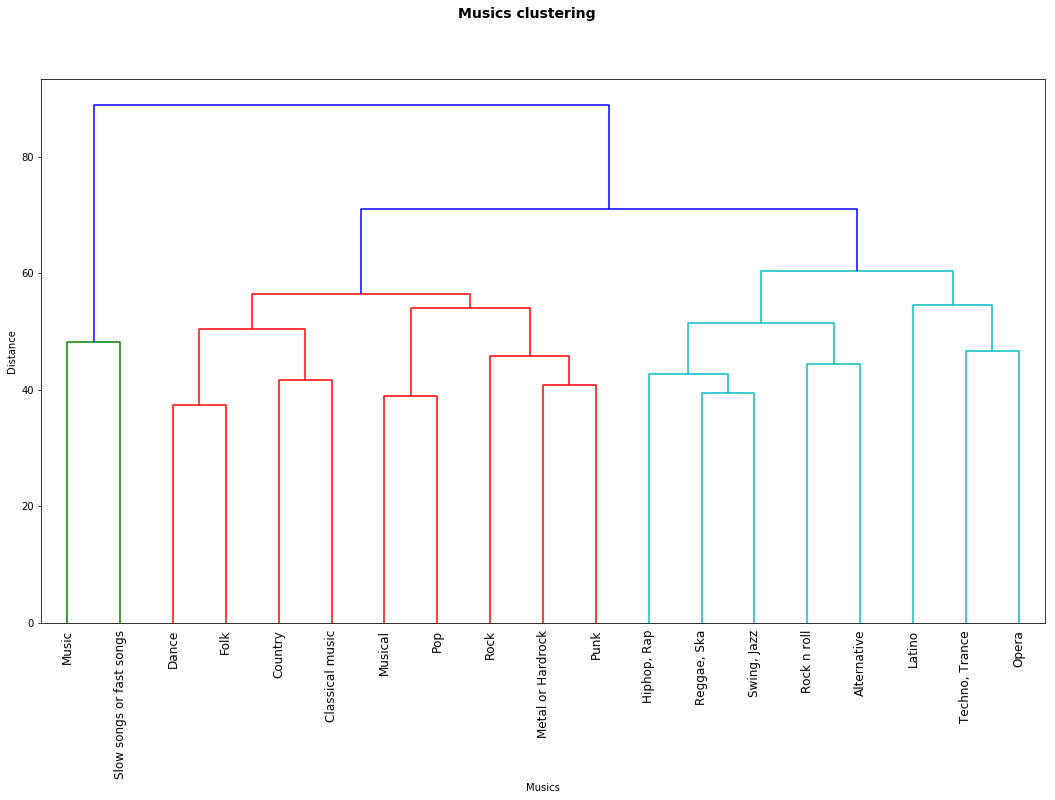

In [28]:
data_array = pd.read_csv("./ressource_cluster/music.csv", ",").T

draw_clusters(data_array, 'Musics')

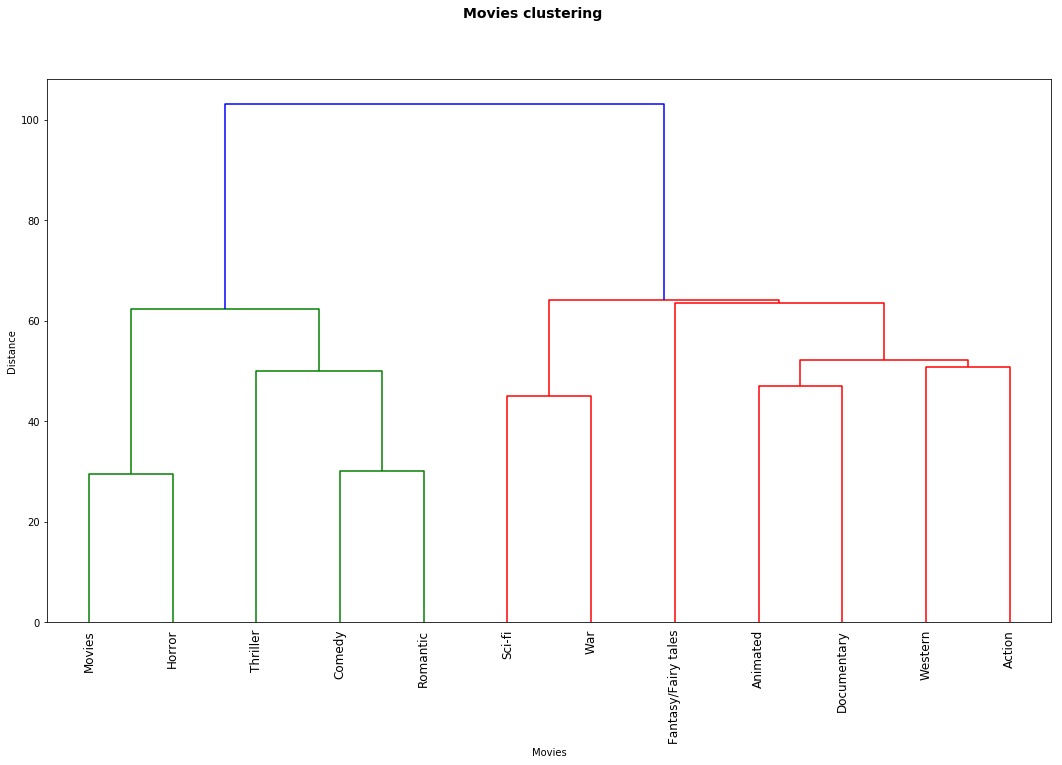

In [6]:
data_array = pd.read_csv("./ressource_cluster/movie.csv", ",").T

draw_clusters(data_array, 'Movies')

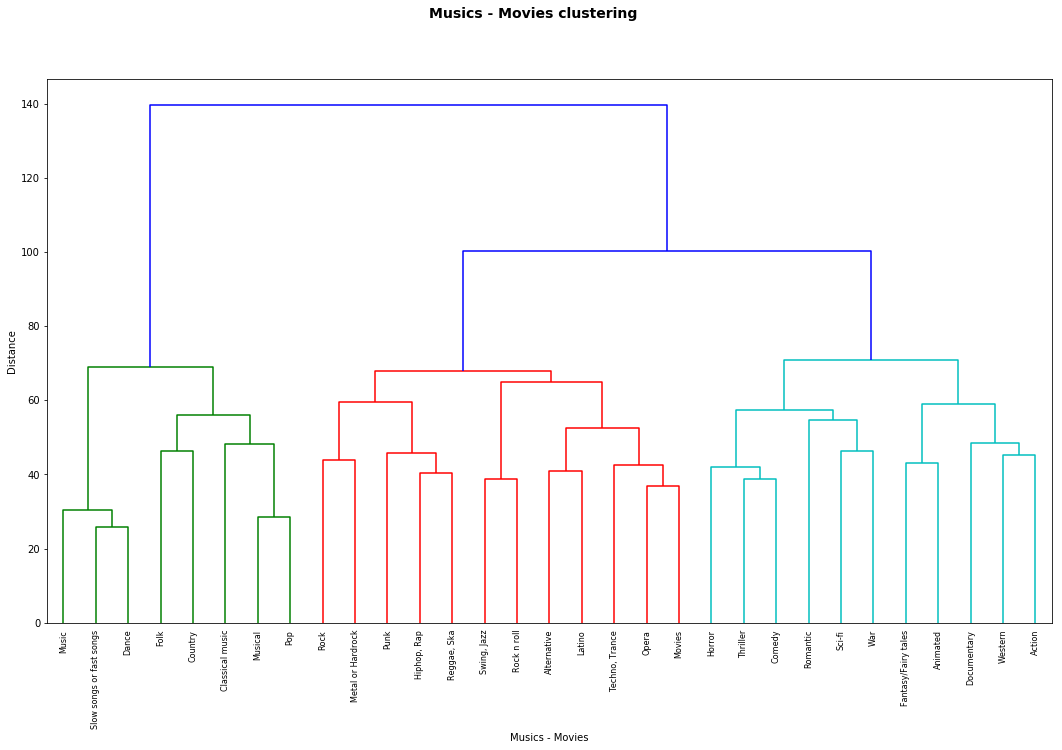

In [7]:
data_array = pd.read_csv("./ressource_cluster/music_movie.csv", ",").T

draw_clusters(data_array, 'Musics - Movies')

Ces dendrograms ont été fait avec la méthode ward et la norme euclidienne. On peut constater la présence de trois clusters principaux, dont notamment une forte corrélation entre ceux qui apprécient le hiphop/rap et ceux qui apprécient le reggae/ska  
Dans le dendrogram concernant les films et les musiques, nous pouvons facilement nous rendre compte que majoritairement, les films et les musiques sont dans des clusters séparés à quelques exceptions près. Nous pouvons donc supposer qu’apprécier un style de musique ne nous prédispose pas à apprécier ou non un type de film.
